In [ ]:
from google.colab import files
uploaded = files.upload()

Saving manufacturing_inflation_data.csv to manufacturing_inflation_data.csv


In [ ]:
import io
import numpy as np
import pandas as pd
from sklearn.linear_model import  LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

#loading the data into data frame
df = pd.read_csv(io.BytesIO(uploaded['manufacturing_inflation_data.csv']))

In [ ]:
#load in the data
df = pd.read_csv('manufacturing_inflation_data.csv')
df

,date,Inflation Rate%,Annual Change,Output Billions of US $,% of GDP Growth Rate
0,31-12-1960,1.7799,NaN,5.461952,14.7501
1,31-12-1961,1.6952,-0.08,6.023684,15.3538
2,31-12-1962,3.6322,1.94,6.688202,15.8633
3,31-12-1963,2.9462,-0.69,7.627609,15.7524
4,31-12-1964,13.3553,10.41,8.387741,14.8507
...,...,...,...,...,...
56,31-12-2016,4.9410,-0.93,347.942712,15.1622
57,31-12-2017,2.4909,-2.45,395.099150,14.8939
58,31-12-2018,4.8607,2.37,395.688247,14.5840
59,31-12-2019,7.6597,2.80,391.495660,13.6461


In [ ]:
df.isnull().sum()

date                       0
Inflation Rate%            0
Annual Change              1
Output Billions of US $    0
% of GDP Growth Rate       0
dtype: int64

In [ ]:
df.describe()


,Inflation Rate%,Annual Change,Output Billions of US $,% of GDP Growth Rate
count,61.000000,60.000000,61.000000,61.000000
mean,7.466720,0.150167,104.233363,15.867900
std,4.935644,5.703754,125.922604,1.035063
min,-7.633900,-22.850000,5.461952,13.231900
25%,4.297200,-2.137500,16.268417,15.162200
50%,7.074300,0.465000,45.539237,15.863300
75%,10.224900,2.597500,131.039692,16.664500
max,28.598700,15.940000,469.159737,17.865900


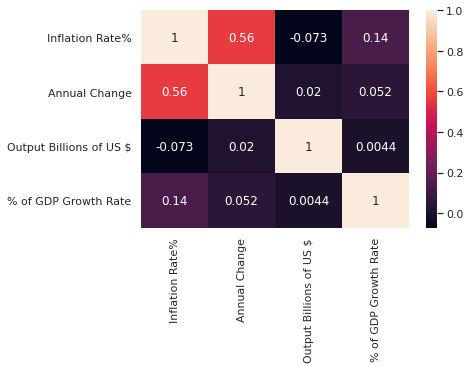

In [ ]:
sns.heatmap(df.corr(),annot=True);


In [ ]:
#
df = df.fillna(df.mean())
df

,date,Inflation Rate%,Annual Change,Output Billions of US $,% of GDP Growth Rate
0,31-12-1960,1.7799,0.150167,5.461952,14.7501
1,31-12-1961,1.6952,-0.080000,6.023684,15.3538
2,31-12-1962,3.6322,1.940000,6.688202,15.8633
3,31-12-1963,2.9462,-0.690000,7.627609,15.7524
4,31-12-1964,13.3553,10.410000,8.387741,14.8507
...,...,...,...,...,...
56,31-12-2016,4.9410,-0.930000,347.942712,15.1622
57,31-12-2017,2.4909,-2.450000,395.099150,14.8939
58,31-12-2018,4.8607,2.370000,395.688247,14.5840
59,31-12-2019,7.6597,2.800000,391.495660,13.6461


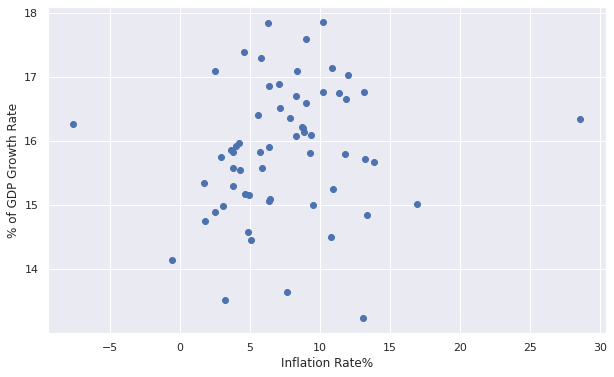

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Inflation Rate%'], df['% of GDP Growth Rate'])
ax.set_xlabel('Inflation Rate%')
ax.set_ylabel('% of GDP Growth Rate')
plt.show()

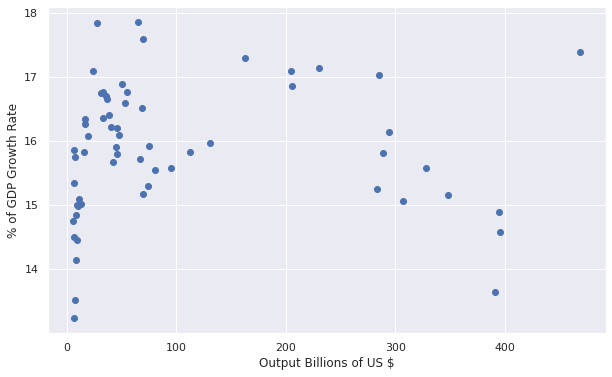

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Output Billions of US $'], df['% of GDP Growth Rate'])
ax.set_xlabel('Output Billions of US $')
ax.set_ylabel('% of GDP Growth Rate')
plt.show()

In [ ]:
X = df[['Inflation Rate%','Output Billions of US $']] #independent variables

In [ ]:
Y = df.iloc[:,4].values
Y

array([14.7501, 15.3538, 15.8633, 15.7524, 14.8507, 15.0109, 14.504 ,
       13.2319, 13.5228, 14.1465, 14.4565, 14.9823, 15.1025, 15.0153,
       16.3459, 15.8385, 16.2659, 16.0809, 17.0964, 17.852 , 16.7524,
       16.7704, 16.37  , 16.6645, 16.7078, 16.418 , 16.2216, 16.2095,
       16.1015, 16.9028, 16.5976, 15.6763, 15.8008, 15.9157, 16.7641,
       17.8659, 17.5963, 16.5186, 15.7193, 15.1805, 15.927 , 15.307 ,
       15.5587, 15.5874, 15.8272, 15.973 , 17.3037, 16.8646, 17.0987,
       17.1436, 17.0299, 16.1393, 15.8169, 15.253 , 15.0656, 15.5839,
       15.1622, 14.8939, 14.584 , 13.6461, 17.4   ])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size= 0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)#predicting the test set results
y_pred = rf.predict(X_test)


In [ ]:
y_pred

array([16.328665, 16.466708, 14.793182, 16.295563, 15.117209, 14.106861,
       16.352929, 15.384242, 15.459334, 16.669651, 14.296888, 14.932361,
       16.532649])

In [ ]:
print('Train Score: ', rf.score(X_train, y_train))  


Train Score:  0.916085904160101


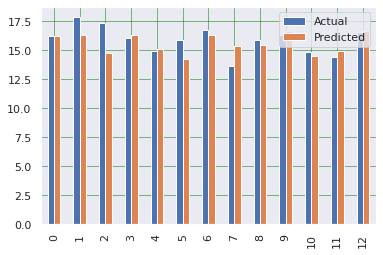

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
#displays a comprehensive table with statistical info generated by statsmodels.
'''This information can provide you additional insights about the model 
used (such as the fit of the model, standard errors, etc):

'''
import statsmodels.api as sm
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.043
Method:                 Least Squares   F-statistic:                           0.001793
Date:                Tue, 20 Apr 2021   Prob (F-statistic):                       0.998
Time:                        13:05:56   Log-Likelihood:                         -200.84
No. Observations:                  48   AIC:                                      405.7
Df Residuals:                      46   BIC:                                      409.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------